In [1]:
#cargo datos
import pandas as pd
import csv

path = r'https://www.pilgrimsolutions.com/dataset/DatosVino2.csv'
df = pd.read_csv(path, sep=';')
df

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9","0,12","6,6",B,5,?,1.0,"4,56"
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4","0,49",112,b,4,?,NaN,"3,01"
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1","0,39","10,2",B,2,?,1.0,1
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5","-0,81","4,4",R,4,?,3.0,"1,85"
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2","0,44","10,1",M,2,?,1.0,"1,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5","0,45","12,7",M,2,*,3.0,"1,55"
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9","0,47","10,3",B,2,?,1.0,"3,79"
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8","3,72","7,6",M,3,?,2.0,"2,15"
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6","0,44","13,8",B,2,*,1.0,"2,44"


In [2]:
#información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Beneficio       6365 non-null   int64  
 2   Compra          6365 non-null   int64  
 3   Acidez          6365 non-null   object 
 4   AcidoCitrico    6365 non-null   object 
 5   pH              6365 non-null   object 
 6   CloruroSodico   6365 non-null   object 
 7   Densidad        6365 non-null   object 
 8   Azucar          6365 non-null   object 
 9   Sulfatos        5761 non-null   object 
 10  Alcohol         6365 non-null   object 
 11  Etiqueta        6365 non-null   object 
 12  CalifProductor  6365 non-null   int64  
 13  Clasificacion   6365 non-null   object 
 14  Region          6258 non-null   float64
 15  PrecioBotella   6365 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 795.8+ KB


In [3]:
#ver duplicados
df.duplicated().sum()

0

In [4]:
#ver nulos, realmente el porcentaje de nulos no es tan significativo, las columnas podrían ser eliminadas pero decido mantenerlas
df.isnull().sum()

ID                  0
Beneficio           0
Compra              0
Acidez              0
AcidoCitrico        0
pH                  0
CloruroSodico       0
Densidad            0
Azucar              0
Sulfatos          604
Alcohol             0
Etiqueta            0
CalifProductor      0
Clasificacion       0
Region            107
PrecioBotella       0
dtype: int64

In [5]:
#elimino los nulos de Región sustituyendolos por cero, en una nueva columna en una copia del dataframe
#en relación a los nulos contenidos en sulfatos decido sustituirlos por la mediana

df2 =df.copy()
df2['Region'] = df2['Region']
df2['Region'].fillna(0, inplace=True)

df2['Sulfatos'] = df2['Sulfatos'].str.replace(',', '.').astype(float)#me aseguro de que pase a numerico, quitando la coma y poniendo punto
df2['Sulfatos'] = pd.to_numeric(df2['Sulfatos'], errors='coerce')
median_sulfatos = df2['Sulfatos'].median()
df2['Sulfatos'] = df2['Sulfatos'].fillna(median_sulfatos)
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9",0.12,"6,6",B,5,?,1.0,"4,56"
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4",0.49,112,b,4,?,0.0,"3,01"
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1",0.39,"10,2",B,2,?,1.0,1
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5",-0.81,"4,4",R,4,?,3.0,"1,85"
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2",0.44,"10,1",M,2,?,1.0,"1,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5",0.45,"12,7",M,2,*,3.0,"1,55"
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9",0.47,"10,3",B,2,?,1.0,"3,79"
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8",3.72,"7,6",M,3,?,2.0,"2,15"
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6",0.44,"13,8",B,2,*,1.0,"2,44"


In [6]:
#compruebo de nuevo los nulos
#ver nulos del nuevo dataframe

df2.isnull().sum()

ID                0
Beneficio         0
Compra            0
Acidez            0
AcidoCitrico      0
pH                0
CloruroSodico     0
Densidad          0
Azucar            0
Sulfatos          0
Alcohol           0
Etiqueta          0
CalifProductor    0
Clasificacion     0
Region            0
PrecioBotella     0
dtype: int64

In [7]:
#compruebo los valores de la columna target
valores_unicos_compra = df2['Compra'].unique()
valores_unicos_compra

array([0, 1])

In [8]:
#cambio
#df2['Compra'] = df2['Compra'].astype('category')
#df2

In [9]:
#recategorización
#compruebo los valores unicos de la clasificacion ya que parecen ser simbolos y si decido utilizarlos es mejor sustituir por su equivalente en números

valores_unicos_clasificacion = df2['Clasificacion'].unique()
valores_unicos_clasificacion

array(['?', '*', '**', '***', '****'], dtype=object)

In [10]:
#utilizo mapping

mapping = {'?': 0, '*': 1, '**': 2, '***': 3, '****': 4}
df2['Clasificacion_int'] = df2['Clasificacion']
df2['Clasificacion_int'] = df2['Clasificacion_int'].replace(mapping)
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella,Clasificacion_int
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9",0.12,"6,6",B,5,?,1.0,"4,56",0
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4",0.49,112,b,4,?,0.0,"3,01",0
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1",0.39,"10,2",B,2,?,1.0,1,0
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5",-0.81,"4,4",R,4,?,3.0,"1,85",0
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2",0.44,"10,1",M,2,?,1.0,"1,28",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5",0.45,"12,7",M,2,*,3.0,"1,55",1
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9",0.47,"10,3",B,2,?,1.0,"3,79",0
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8",3.72,"7,6",M,3,?,2.0,"2,15",0
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6",0.44,"13,8",B,2,*,1.0,"2,44",1


In [11]:
#respecto a las etiquetas, son siglas de vino blanco, rosado etc
#compruebo valores unicos

valores_unicos_etiqueta = df2['Etiqueta'].unique()
valores_unicos_etiqueta

array(['B', 'b', 'R', 'M', 'r', 'MB', 'MM', 'mb', 'm', 'mm'], dtype=object)

In [12]:
#asigno valor numérico a cada tipo de vino en una nueva columna

mapping = {'B': 1, 'b': 2, 'R': 3, 'M': 4, 'r': 5, 'MB':6, 'MM':7, 'mb':8, 'm':9, 'mm':10 }
df2['Etiqueta_int'] = df2['Etiqueta']
df2['Etiqueta_int'] = df2['Etiqueta_int'].replace(mapping)
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella,Clasificacion_int,Etiqueta_int
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9",0.12,"6,6",B,5,?,1.0,"4,56",0,1
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4",0.49,112,b,4,?,0.0,"3,01",0,2
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1",0.39,"10,2",B,2,?,1.0,1,0,1
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5",-0.81,"4,4",R,4,?,3.0,"1,85",0,3
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2",0.44,"10,1",M,2,?,1.0,"1,28",0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5",0.45,"12,7",M,2,*,3.0,"1,55",1,4
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9",0.47,"10,3",B,2,?,1.0,"3,79",0,1
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8",3.72,"7,6",M,3,?,2.0,"2,15",0,4
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6",0.44,"13,8",B,2,*,1.0,"2,44",1,1


In [13]:
#el precio de las botellas está como tipo objeto y puede ser relevante cambio a numérico, al igual que el azucar,el ph....

columnas_num = ['Azucar','Densidad','pH','AcidoCitrico', 'Acidez','PrecioBotella','CloruroSodico']
df2[columnas_num] = df2[columnas_num].applymap(lambda x: float(x.replace(',', '.')))
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella,Clasificacion_int,Etiqueta_int
0,13606,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,"6,6",B,5,?,1.0,4.56,0,1
1,3119,0,0,2.19,2.58,5.54,0.205,0.95373,6.4,0.49,112,b,4,?,0.0,3.01,0,2
2,1190,0,0,1.44,-1.54,5.10,0.058,0.99271,7.1,0.39,"10,2",B,2,?,1.0,1.00,0,1
3,5261,0,0,0.50,0.30,5.23,0.276,0.99590,3.5,-0.81,"4,4",R,4,?,3.0,1.85,0,3
4,2871,0,0,-0.10,0.30,5.75,0.048,1.02724,7.2,0.44,"10,1",M,2,?,1.0,1.28,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,0.41,0.17,8.55,-0.079,0.96961,9.5,0.45,"12,7",M,2,*,3.0,1.55,1,4
6361,4285,0,0,-0.77,0.29,8.96,0.042,0.99304,8.9,0.47,"10,3",B,2,?,1.0,3.79,0,1
6362,13580,0,0,0.41,0.07,8.88,0.587,0.99620,4.8,3.72,"7,6",M,3,?,2.0,2.15,0,4
6363,10080,0,0,-0.20,0.38,8.19,0.052,1.00796,13.6,0.44,"13,8",B,2,*,1.0,2.44,1,1


In [ ]:
#hay columnas de tipo objeto que además se refieren a porcentajes, modifico
#aplico la transformación a las columnas seleccionadas

porcentaje = ['Alcohol']
df2[porcentaje] = df2[porcentaje].applymap(lambda x: float(x.replace(',', '.')) * 100)
df2

In [14]:
#procedo con la anulacion de valores negativos. 
#según he investigado, en la información de la química del vino no puede haber resultados negativos en la acidez, acido citrico, ph, cloruro, sulfatos
#realmente son columnas que en otras pruebas que hice pueden ser eliminadas o no ser del todo relevantes, pero las he aprovechado para practicar

replace = ['Acidez', 'AcidoCitrico', 'pH', 'CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos']

df2[replace] = df2[replace].applymap(lambda x: 0 if x < 0 else x)
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella,Clasificacion_int,Etiqueta_int
0,13606,0,0,0.39,0.14,4.99,0.073,1.02195,5.9,0.12,"6,6",B,5,?,1.0,4.56,0,1
1,3119,0,0,2.19,2.58,5.54,0.205,0.95373,6.4,0.49,112,b,4,?,0.0,3.01,0,2
2,1190,0,0,1.44,0.00,5.10,0.058,0.99271,7.1,0.39,"10,2",B,2,?,1.0,1.00,0,1
3,5261,0,0,0.50,0.30,5.23,0.276,0.99590,3.5,0.00,"4,4",R,4,?,3.0,1.85,0,3
4,2871,0,0,0.00,0.30,5.75,0.048,1.02724,7.2,0.44,"10,1",M,2,?,1.0,1.28,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,0.41,0.17,8.55,0.000,0.96961,9.5,0.45,"12,7",M,2,*,3.0,1.55,1,4
6361,4285,0,0,0.00,0.29,8.96,0.042,0.99304,8.9,0.47,"10,3",B,2,?,1.0,3.79,0,1
6362,13580,0,0,0.41,0.07,8.88,0.587,0.99620,4.8,3.72,"7,6",M,3,?,2.0,2.15,0,4
6363,10080,0,0,0.00,0.38,8.19,0.052,1.00796,13.6,0.44,"13,8",B,2,*,1.0,2.44,1,1


In [15]:
#elimino la columna id
df2.drop('ID', axis=1, inplace=True)

In [16]:
#obtengo los datos de las variables numéricas
df2.describe()

,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,CalifProductor,Region,PrecioBotella,Clasificacion_int,Etiqueta_int
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,452.380204,0.785232,0.488482,0.500795,7.528735,47.060163,0.994204,8.851280,0.673832,2.758523,1.977848,2.610652,1.500864,3.427494
std,308.380542,0.410694,0.564904,0.602525,1.118732,211.362638,0.026417,3.212404,0.665892,1.302336,0.851652,1.480274,1.191266,1.926762
min,0.000000,0.000000,0.000000,0.000000,4.800000,0.000000,0.888090,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,236.000000,1.000000,0.130000,0.020000,6.820000,0.000000,0.988245,6.700000,0.330000,2.000000,1.000000,1.420000,0.000000,3.000000
50%,480.000000,1.000000,0.280000,0.310000,7.920000,0.048000,0.994400,8.900000,0.500000,3.000000,2.000000,2.190000,1.000000,3.000000
75%,671.000000,1.000000,0.650000,0.580000,8.400000,0.224000,1.000600,11.000000,0.770000,3.000000,3.000000,3.440000,2.000000,4.000000
max,1568.000000,1.000000,3.680000,3.860000,9.300000,999.000000,1.099240,21.000000,4.210000,9.000000,3.000000,11.440000,4.000000,10.000000


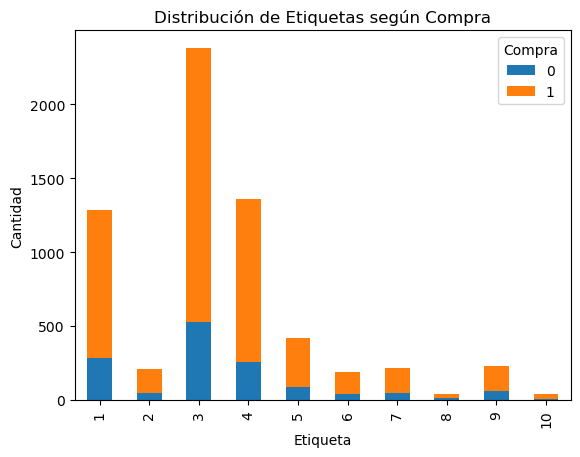

In [17]:
#por curiosidad compruebo que tipo de vino aparece más, siendo el Rosado

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame solo con las columnas "Etiqueta" y "Compra"
df2_etiqueta_compra = df2[['Etiqueta_int', 'Compra']]

# Contar las ocurrencias de cada etiqueta según el valor de compra
conteo_etiqueta_compra = df2_etiqueta_compra.groupby(['Etiqueta_int', 'Compra']).size().unstack()

# Crear el gráfico de barras apiladas
conteo_etiqueta_compra.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.title('Distribución de Etiquetas según Compra')
plt.legend(title='Compra')

# Mostrar el gráfico
plt.show()

In [18]:
#procedo con la comprobación de correlación de variables
correlation_matrix = df2.corr()
print(correlation_matrix)

                   Beneficio    Compra    Acidez  AcidoCitrico        pH  \
Beneficio           1.000000  0.767250 -0.080253      0.013892 -0.146917   
Compra              0.767250  1.000000 -0.069558      0.008526 -0.101149   
Acidez             -0.080253 -0.069558  1.000000     -0.004851  0.001198   
AcidoCitrico        0.013892  0.008526 -0.004851      1.000000 -0.016350   
pH                 -0.146917 -0.101149  0.001198     -0.016350  1.000000   
CloruroSodico       0.007325 -0.003279 -0.010931     -0.008829 -0.018819   
Densidad           -0.025119 -0.021832  0.011531     -0.017769  0.028966   
Azucar              0.502255  0.377222 -0.048066     -0.007153 -0.068084   
Sulfatos           -0.026646 -0.034332  0.001987     -0.008413 -0.004006   
CalifProductor     -0.240221 -0.281181  0.040655      0.075244  0.034019   
Region             -0.004164  0.000322  0.023423      0.011211  0.015508   
PrecioBotella       0.012671  0.008687 -0.004210     -0.018844 -0.015323   
Clasificacio

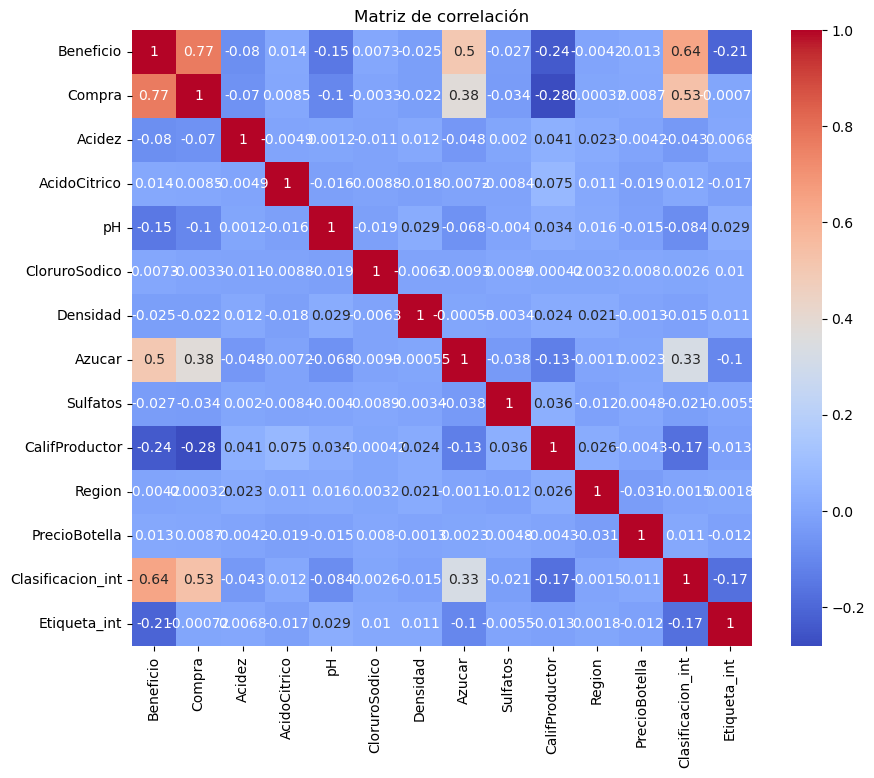

In [19]:

# Calcula la matriz de correlación
correlation_matrix = df2.corr()

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [20]:
df2.corr()[['Compra']].sort_values(by='Compra', ascending = False)

,Compra
Compra,1.000000
Beneficio,0.767250
Clasificacion_int,0.531123
Azucar,0.377222
PrecioBotella,0.008687
AcidoCitrico,0.008526
Region,0.000322
Etiqueta_int,-0.000718
CloruroSodico,-0.003279
Densidad,-0.021832


La correlación entre "Beneficio" y "Compra" es de 0.767250, lo que indica una correlación positiva fuerte. Esto significa que a medida que aumenta el beneficio, es más probable que se realice una compra.


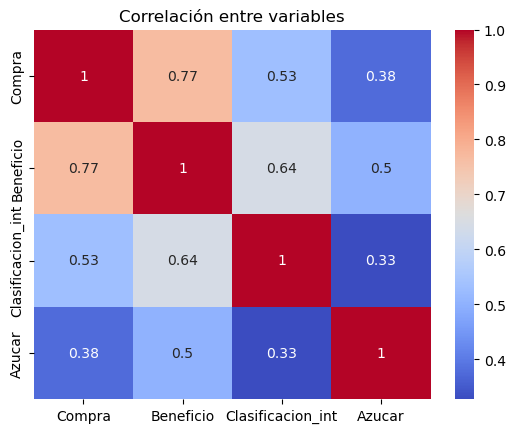

In [21]:
#comprobacion de las correlaciones mas altas
correlaciones_df = df2[['Compra', 'Beneficio', 'Clasificacion_int', 'Azucar']]

# Calcular la matriz de correlación
correlation_matrix = correlaciones_df.corr()

# Crear el gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

Podemos observar que las variables que tienen más correlación con 'Compra', también la tienen con 'Beneficio', que es la variable que tiene correlación más alta

In [22]:
#compruebo de otra manera la relación entre Clasificacion_int y Compra ya que son variables categoricas
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre las variables "Clasificacion_int" y "Compra"
contingencia = pd.crosstab(df2['Clasificacion_int'], df2['Compra'])

# Aplicar el test de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingencia)

# Imprimir los resultados
print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Valores esperados:", expected)


Estadístico chi-cuadrado: 2264.240502645909
Valor p: 0.0
Grados de libertad: 4
Valores esperados: [[ 360.81068342 1319.18931658]
 [ 329.66928515 1205.33071485]
 [ 376.70353496 1377.29646504]
 [ 230.66111548  843.33888452]
 [  69.15538099  252.84461901]]


El resultado indica que hay una asociación estadísticamente significativa entre las variables "Clasificacion_int" y "Compra", lo que sugiere que la variable "Clasificacion_int" puede ser un predictor importante para la variable "compra".

In [23]:
#comprobacion del modelo

from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# División de los datos en conjunto de entrenamiento y prueba
X = df2[['Beneficio', 'Clasificacion_int', 'Azucar']]  # Variables predictoras
y = df2['Compra']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y ajuste del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("Puntaje F1:", f1)


Precisión: 1.0
Recall: 1.0
Puntaje F1: 1.0


In [24]:
X = df2[['Azucar', 'Clasificacion_int']]
y = df2['Compra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8554595443833464
Precision: 0.8999008919722498
Recall: 0.9162462159434914
F1-score: 0.908


In [25]:

# Definir los datos de entrada (X) y la variable objetivo (y)
X = df2[['Beneficio', 'Clasificacion_int']]
y = df2['Compra']

# Definir el modelo de regresión logística
model = LogisticRegression()

# Definir el número de divisiones (k) para la validación cruzada
k = 5

# Definir el esquema de validación cruzada
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener los puntajes de precisión
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Imprimir los puntajes de precisión obtenidos en cada iteración
print("Puntajes de precisión:", scores)

# Calcular la precisión promedio y desviación estándar de los puntajes
mean_accuracy = scores.mean()
std_accuracy = scores.std()

# Imprimir la precisión promedio y desviación estándar
print("Precisión promedio:", mean_accuracy)
print("Desviación estándar:", std_accuracy)

Puntajes de precisión: [1. 1. 1. 1. 1.]
Precisión promedio: 1.0
Desviación estándar: 0.0


Los resultados obtenidos con la regresión logística muestran una alta precisión y puntajes perfectos en las métricas de precisión, recall y F1-score para diferentes combinaciones de variables.

En el primer caso, al usar las variables 'Beneficio', 'Clasificacion_int' y 'Azucar', se obtiene un puntaje perfecto de 1.0 en todas las métricas. Esto indica que el modelo de regresión logística pudo ajustarse perfectamente a los datos y realizar predicciones precisas en el conjunto de prueba.

En el segundo caso, al usar las variables 'Azucar' y 'Clasificacion_int', se obtiene una precisión de aproximadamente 0.86, lo cual sigue siendo bastante alto. La precisión representa la proporción de predicciones correctas en relación con el total de predicciones realizadas. Además, hay valores altos en las métricas de recall (0.92) y F1-score (0.91), lo que indica un buen equilibrio entre la precisión y la capacidad del modelo para capturar los casos positivos.

En el último caso, con la validación cruzada con las variables 'Beneficio' y 'Clasificacion_int' obtuve puntajes de precisión perfectos (1.0) en todas las iteraciones. Esto indica que el modelo es capaz de generalizar bien y tener un rendimiento consistente en diferentes subconjuntos de datos.

En general, los resultados muestran que las variables 'Beneficio', 'Clasificacion_int' y 'Azucar' tienen una fuerte relación con la variable objetivo 'Compra', y el modelo de regresión logística puede capturar esta relación y realizar predicciones precisas. Sin embargo, sigo teniendo dudas sobre que este análisis sea correcto, pero me ha gustado practicar tantas cosas y de paso aprender sobre vinos.
